In [1]:
import json

In [2]:
data=json.loads(open('static/js/seeCOVID19/clean.json',"r").read())

In [3]:
# timeseries=data['locations'][485]["timelines"]["confirmed"]["timeline"]
timeseries=data['locations'][440]["timelines"]["confirmed"]["timeline"]


In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
y=list(timeseries.values())
tslen=len(y)
x=range(tslen)

In [6]:
def f(x, a, c, d):
    return a / (1. + np.exp(-c * (x - d)))

In [7]:
# (a_, c_, d_), _ = opt.curve_fit(f, x, y)


In [8]:
def fideal(x, A, k, x0):
    outlist=[]
    for xi in x:
        
        outlist.append(A*(1-(1/(1+np.exp((xi-x0)/k)))))
    return outlist

In [9]:
fideal(x,96457.0224,4.84637719,58.3859675)

[0.5652450825465398,
 0.6947817485316116,
 0.8540039434876076,
 1.0497144767355338,
 1.2902750375823866,
 1.5859633814810232,
 1.9494123400810688,
 2.3961493906682287,
 2.945259804898371,
 3.6202016598584814,
 4.44980745673923,
 5.469515025574873,
 6.722880131363208,
 8.263435142088628,
 10.156972768384664,
 12.48435183886764,
 15.344944067605187,
 18.860867684363434,
 23.18218670525366,
 28.49329480132295,
 35.02075171056908,
 43.04289974485377,
 52.90166029685238,
 65.01699780831868,
 79.90464420938525,
 98.19780345469603,
 120.67370672482703,
 148.2860673547184,
 182.20469339280962,
 223.86375660304887,
 275.02048925806844,
 337.8263799577876,
 414.91325623623794,
 509.49695385496625,
 625.5015433324472,
 767.7072520540778,
 941.9251880980532,
 1155.2015912958984,
 1416.0533885092016,
 1734.7349994233186,
 2123.5331929205677,
 2597.081761548381,
 3172.6801577090428,
 3870.589232107986,
 4714.262106579149,
 5730.448638182658,
 6949.08843399134,
 8402.882253627353,
 10126.41007588153,

In [11]:
from lmfit.models import StepModel, LinearModel
import matplotlib.pyplot as plt

xdata=np.array(x)
ydata=np.array(y)
# model data as Step + Line
step_mod = StepModel(form='logistic', prefix='step_')

model = step_mod

# make named parameters, giving initial values:
pars = model.make_params(line_intercept=ydata.min(),
                         line_slope=0,
                         step_center=xdata.mean(),
                         step_amplitude=ydata.std(),
                         step_sigma=1)

# fit data to this model with these parameters
out = model.fit(ydata, pars, x=xdata)

relativeErrors=[]
values=[]
for name, param in out.params.items():
    values.append(param.value)
    relativeErrors.append(100*param.stderr/param.value)
amplitudeErr=relativeErrors[0]
amplitude=values[0]
centerErr=relativeErrors[1]
center=values[1]
sigmaErr=relativeErrors[2]
sigma=values[2]

day0=list(timeseries.keys())[0]

print("Time Series Day 0",day0)
print("Projected Total Cases",amplitude)
print("Projected Turning Point",center)
print("Projected Sigma",sigma)

Time Series Day 0 2020-01-22T00:00:00Z
Projected Total Cases 9053.670278995387
Projected Turning Point 60.975939015467
Projected Sigma 4.114680058493083


In [ ]:
for name, param in out.params.items():
    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))
# print results
print(out.fit_report())

# plot data and best-fit
plt.plot(xdata, ydata, 'b')
plt.plot(xdata, out.best_fit, 'r-')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, out.best_fit, 'o')
ax.plot(x, fideal(x, amplitude, sigma, center), '-')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


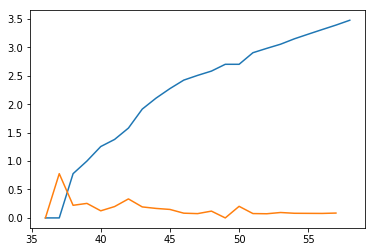

In [15]:
plt.plot(np.log10(ydata))
plt.plot(np.diff(np.log10(ydata)))

plt.show()

In [17]:
len((np.log10(ydata)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


59